<h2>es06: Ising Model<h2>

In [3]:
import numpy as np
from myPythonModule import measurements
import matplotlib.pyplot as plt
import myPythonModule as my
import os
import re


First of all, we do some preliminary analysis: we compute $5\times10^4$ MC steps for every temperature, in order to detect the equilibration point (after how many steps the system thermalizes) and the typical autocorrelation length

In [4]:
dirname = "exercices/output/dir06/output_files_eq"

regValid = re.compile (r"(?<=\.)dat")
regSampling = re.compile (r"\w(?=_)")
regH = re.compile (r"(?<=h)([0-9.]*)(?=_)")
regT = re.compile (r"(?<=T)([0-9.]*)(?=_)")


dataset = {}
for filename in os.listdir (dirname) :
    if regValid.search (filename):
        key1 = float(regH.search (filename) . group())
        key2 = float(regT.search (filename) . group())
        key3 = regSampling.search (filename) . group()
        
        dataset [(key1, key2, key3)] = measurements (5, (1,3,3,3,3), dirname + '/' + filename, consumeString = "Temp")




reading exercices/output/dir06/output_files_eq/g_h0.02_T0.5_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files_eq/g_h0.02_T0.67_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files_eq/g_h0.02_T0.83_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
re

reading exercices/output/dir06/output_files_eq/m_h0.02_T1.5_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files_eq/m_h0.02_T1.7_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files_eq/m_h0.02_T1.8_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
read

In [5]:
#see what data we fished
temps = []
print ("keys: ")
for keys, value in dataset.items():
    if keys[0] == 0 and keys [2] == "m":
        temps.append (keys [1])
    print (keys)
    
temps = sorted (temps)
print ("temperatures:", temps)
    

keys: 
(0.02, 0.5, 'g')
(0.02, 0.67, 'g')
(0.02, 0.83, 'g')
(0.02, 1.2, 'g')
(0.02, 1.3, 'g')
(0.02, 1.5, 'g')
(0.02, 1.7, 'g')
(0.02, 1.8, 'g')
(0.02, 1.0, 'g')
(0.02, 2.0, 'g')
(0.0, 0.5, 'g')
(0.0, 0.67, 'g')
(0.0, 0.83, 'g')
(0.0, 1.2, 'g')
(0.0, 1.3, 'g')
(0.0, 1.5, 'g')
(0.0, 1.7, 'g')
(0.0, 1.8, 'g')
(0.0, 1.0, 'g')
(0.0, 2.0, 'g')
(0.02, 0.5, 'm')
(0.02, 0.67, 'm')
(0.02, 0.83, 'm')
(0.02, 1.2, 'm')
(0.02, 1.3, 'm')
(0.02, 1.5, 'm')
(0.02, 1.7, 'm')
(0.02, 1.8, 'm')
(0.02, 1.0, 'm')
(0.02, 2.0, 'm')
(0.0, 0.5, 'm')
(0.0, 0.67, 'm')
(0.0, 0.83, 'm')
(0.0, 1.2, 'm')
(0.0, 1.3, 'm')
(0.0, 1.5, 'm')
(0.0, 1.7, 'm')
(0.0, 1.8, 'm')
(0.0, 1.0, 'm')
(0.0, 2.0, 'm')
temperatures: [0.5, 0.67, 0.83, 1.0, 1.2, 1.3, 1.5, 1.7, 1.8, 2.0]


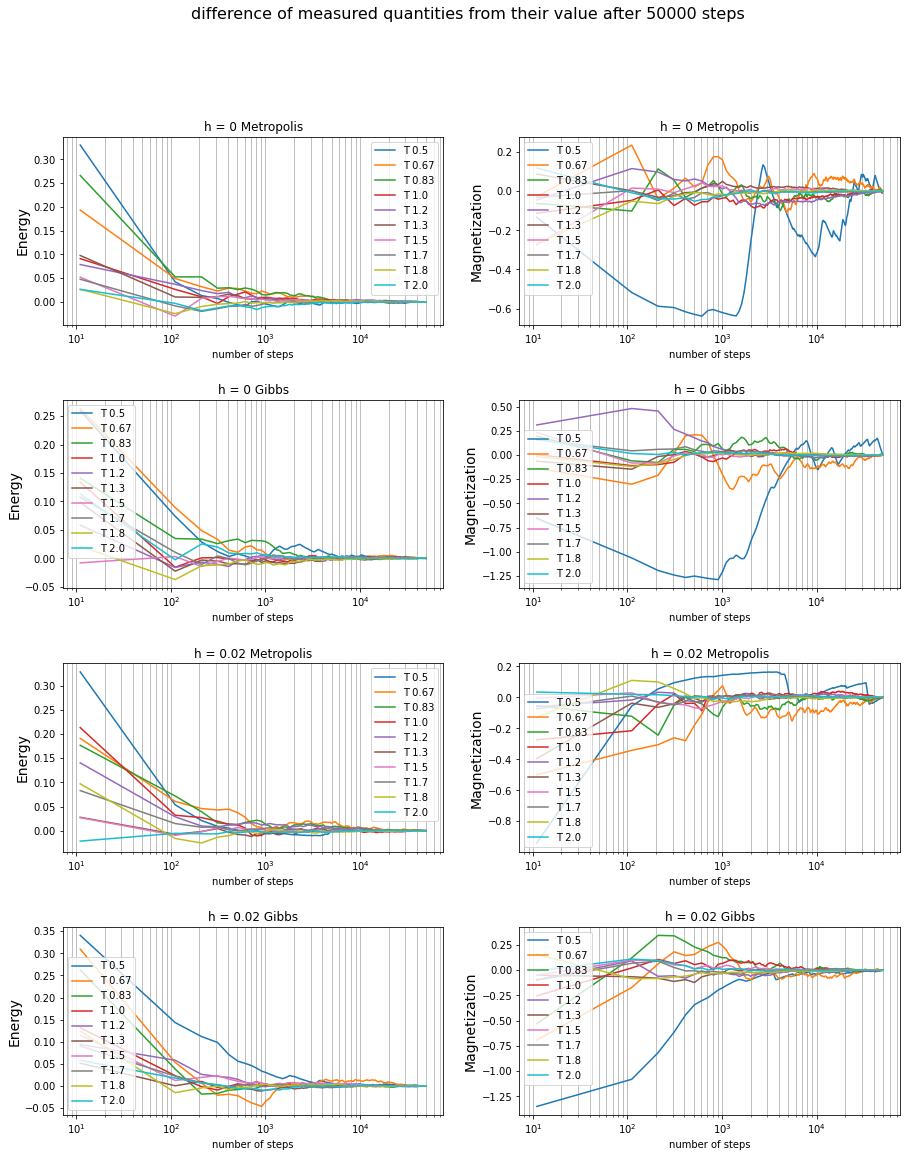

In [6]:
import matplotlib.pyplot as plt
#plot values for finding equilibration
fig, axes = plt.subplots (4,2)
fig.set_size_inches (15,18)
fig.subplots_adjust (hspace = 0.4)
fig.suptitle ("difference of measured quantities from their value after 50000 steps", fontsize=16)

H_values = [0, 0.02]
Sampling_algorithms = ["m", "g"]
Quantities = ["iblk", "Energy", "Capacity", "Magnetization", "Suceptivity"]

skipfirst = 10
picksome = 100

scaletype = "log"

for indh, h in enumerate (H_values):
    for inds , s in enumerate (Sampling_algorithms):
        for ax, q in zip (axes [2 * indh + inds], [1,3]):
            for temp in temps:
                element = dataset[(h, temp, s)]
                #element.print_names ()    
                ax.plot (element.data [0] ["iblk"] [skipfirst::picksome], 
                         element.data [q] ["mean"] [skipfirst::picksome] - element.data [q] ["mean"] [-1], 
                         label="T "+str(temp) )
            ax.set_title ("h = " + str(h) + (" Metropolis" if s == "m" else " Gibbs"))
            ax.set_xlabel ("number of steps")
            ax.set_ylabel ( Quantities [q] , fontsize = 14)
            ax.set_xscale (scaletype)
            ax.grid (True, axis="x", which="both")
            ax.legend ()
                
        
   


It can be observed that, in any setup, the difference between "final" value and instantaneuos mean goes to about 0.01 (which is the same order of statistic uncertainty) within about 20000 steps. No substantial difference seems to exist between Metropolis and Gibbs  sampling. This may be due to the fact that heavily mediated macroscopic quantities are beign considered. Moreover, the Metropolis and the Gibbs algorithm statistically sample equivalent probability distribution, since the latter is basically a more efficient version of the former. It can also be seen from the magnetization plots, that the Gibbs algorithm equilibrates faster than the Metropolis algorithm does 

In [7]:
ys = {}

#qnames = ["Energy", "Capacity", "Mag", "Chi"]
for keys, element in dataset.items():
    ys [keys] = [my.autocorrelation (element.data [1] ["Energy"], 10000), my.autocorrelation (element.data [3] ["Mag"], 10000)] 



next, we compute autocorrelation in the preliminary data in order to determine the right size for blocks

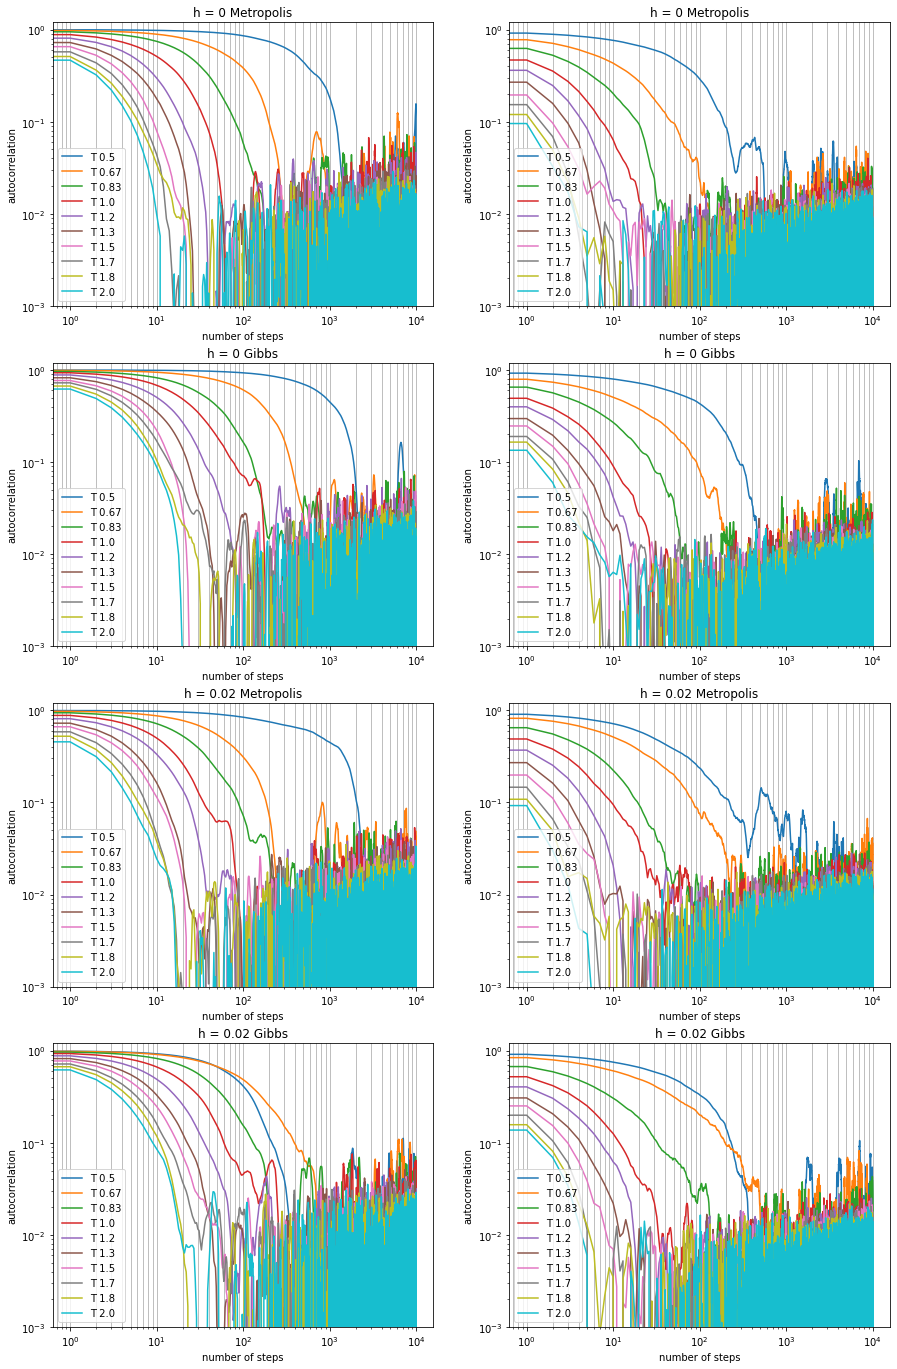

In [8]:
fig, axes = plt.subplots (4,2)
fig.set_size_inches (15,24)

    
for indh, h in enumerate (H_values):
    for inds , s in enumerate (Sampling_algorithms):
        for ax, q in zip (axes [2 * indh + inds], [3,1]):
            for temp in temps:
                y = ys [(h, temp, s)] 
                #element.print_names ()    
                ax.plot (range (y[int((q-1)/2)].shape[0]), y[int((q-1)/2)], label="T "+str(temp) )
            ax.set_title ("h = " + str (h) + (" Metropolis" if s == "m" else " Gibbs"))
            ax.set_xlabel ("number of steps")
            ax.set_ylabel ("autocorrelation")
            ax.set_xscale (scaletype)
            ax.set_yscale (scaletype)
            ax.set_ylim ((1e-3, 1.2))
            ax.grid (True, axis="x", which="both")
            ax.legend ()
                
     
   


The block size will be chosen to be $10^5$, since even after $10^4$ steps the correlation lies about 0.1. It is impossible to know, from the computed preliminary data, if that size is big enough, but calculating the next order of magintude points ($5\times10^5$) would be extremely time-consuming

Now, we load the (block) averages computed by simulating the system at 10 (reduced) temperature values in range between 0.5 and 2 

In [38]:
dirname = "exercices/output/dir06/output_files"

dataset = {}
for filename in os.listdir (dirname) :
    if regValid.search (filename):
        key1 = float(regH.search (filename) . group())
        key2 = float(regT.search (filename) . group())
        key3 = regSampling.search (filename) . group()
        
        dataset [(key1, key2, key3)] = measurements (5, (1,3,3,3,3), dirname + '/' + filename, consumeString = "Temp")




reading exercices/output/dir06/output_files/g_h0.02_T0.5_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files/g_h0.02_T0.67_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exercices/output/dir06/output_files/g_h0.02_T0.83_.dat
found headers:  ['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']
['iblk', 'Energy', 'mean', 'error', 'Capacity', 'mean', 'error', 'Mag', 'mean', 'error', 'Chi', 'mean', 'error']  used as dictionary keys
reading exe

In [13]:
#preparing arrays for plots
Tarrays = [
    [],
    [],
    [],
    []
]

for temp in temps:
    element1 = dataset [(0, temp, "m")]
    element2 = dataset [(0.02, temp, "m")]
    element3 = dataset [(0, temp, "g")]
    element4 = dataset [(0.02, temp, "g")]
    for i in range (4):
        if i != 2:
            Tarrays [i].append ( np.array ( (element1.data [i+1] ["mean"] [-1], element1.data [i+1] ["error"] [-1], 
                                             element3.data [i+1] ["mean"] [-1], element3.data [i+1] ["error"] [-1]) ) ) 
        else:
            Tarrays [i].append ( np.array ( (element2.data [2+1] ["mean"] [-1], element2.data [2+1] ["error"] [-1], 
                                             element4.data [2+1] ["mean"] [-1], element4.data [2+1] ["error"] [-1]) ) )

Tarrays = [np.reshape ((np.concatenate ([np.expand_dims (arr, 0) for arr in Tarr], axis=0)).transpose(), (2,2,-1)) 
           for Tarr in Tarrays]          

Tarrays = [Tarrays[1::2], Tarrays[::2]]
print (Tarrays)



[[array([[[3.93927e-01, 4.30735e-01, 4.63802e-01, 4.23830e-01,
         3.92133e-01, 3.32941e-01, 2.98773e-01, 2.56236e-01,
         2.24931e-01, 1.98665e-01],
        [1.86967e-03, 7.14190e-04, 3.71928e-04, 2.73821e-04,
         1.88878e-04, 8.43983e-05, 8.00867e-05, 8.06471e-05,
         3.29728e-05, 2.53972e-05]],

       [[3.76502e-01, 4.59270e-01, 4.61252e-01, 4.23206e-01,
         3.88614e-01, 3.34052e-01, 2.89623e-01, 2.53860e-01,
         2.24175e-01, 1.98117e-01],
        [1.41866e-03, 6.07641e-04, 4.22661e-04, 2.48620e-04,
         2.29100e-04, 7.49146e-05, 7.96092e-05, 2.46094e-05,
         2.53058e-05, 2.58770e-05]]]), array([[[6.09877e+01, 2.52338e+01, 1.36253e+01, 7.02603e+00,
         4.74095e+00, 3.19951e+00, 2.55864e+00, 1.96869e+00,
         1.58285e+00, 1.36685e+00],
        [6.78653e-02, 1.55306e-02, 3.26588e-03, 2.38849e-03,
         1.15066e-03, 4.50795e-04, 3.89964e-04, 2.63705e-04,
         1.82691e-04, 9.27792e-05]],

       [[6.05385e+01, 2.95480e+01, 1.25724e

For the calculation of mean magnetization, a sum over the system spins is carried out at every Measure() call. In order to compute the specific heat and magnetic suceptibility, on the other hand, the square of the total system energy and magnetization are added to the ic-th and ix-th accumulators respectively, so that at the end of each block one is able to compute the variance of the energy and magnetization estimates over iterations. All of this fixes affect the Measure() method in the provided simulation code. Then, block averaging for all of the four quantities of interest is also implemented in Averages()

In [14]:
#compute expectations with code from LSN_Exercise06
points=10
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)




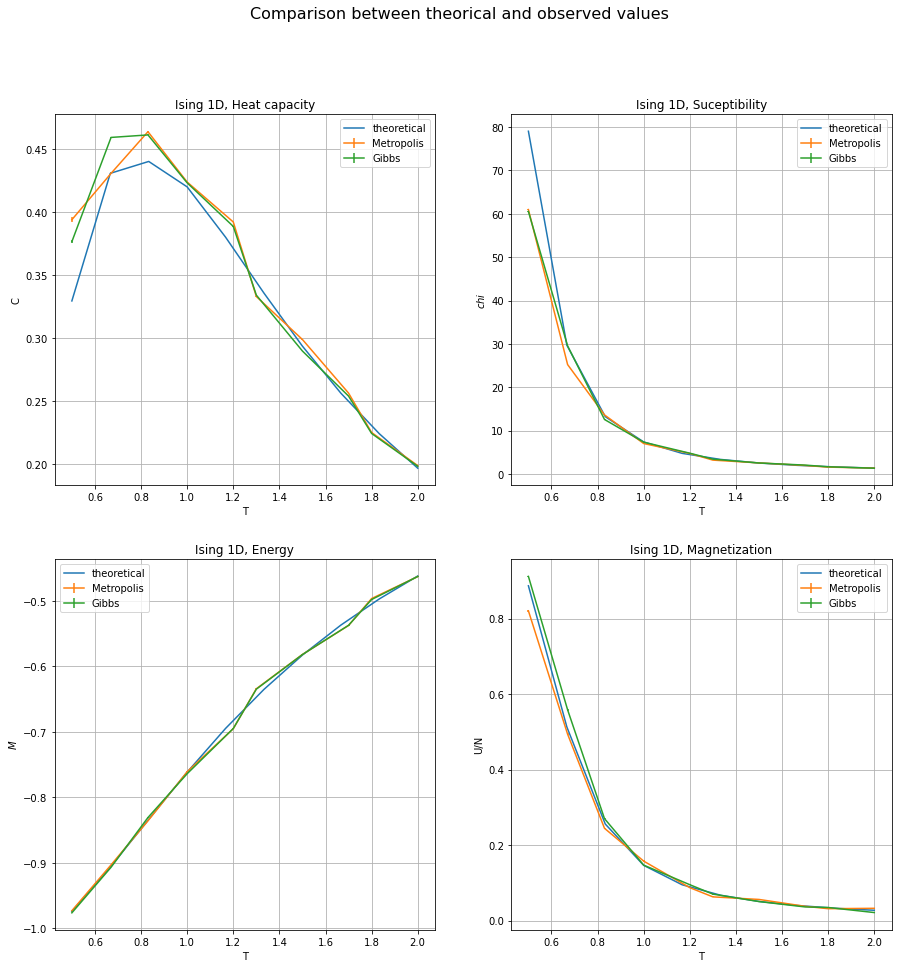

In [15]:
#plot comparison
names = ["Metropolis", "Gibbs"]

fig, axes = plt.subplots (2,2)
fig.set_size_inches (15, 15)
fig.suptitle ("Comparison between theorical and observed values", fontsize=16)

theoreticals = [[heat, X],[e, M]]
titles = [["Heat capacity", "Suceptibility"], ["Energy", "Magnetization"]]
labels = [["C", "$chi$"], ["$M$","U/N"]]
algorithms = ["Metropolis", "Gibbs"]

for t, l, axx, d, theo in zip (titles, labels, axes, Tarrays, theoreticals ):
    for title, label, ax, data, theoretical in zip (t, l, axx, d, theo):
        ax.plot (T, theoretical, label="theoretical")
        ax.set_title ("Ising 1D, {}".format(title))
        ax.set_xlabel('T')
        ax.set_ylabel(label)
        ax.grid(True)
        for algdata, algorithm in zip (data, algorithms):
            ax.errorbar (temps, algdata[0], algdata[1], label=algorithm)
        ax.legend()



There seems to be good agreement between the expectations and the calculated values, especially for magnetization and per-spin energy, even though errors have been underestimated as usual. However, the heat capacity and magnetic susceptibility values, at low temperatures, differ from the theoretical ones. This shows that, at low temperatures, the system does not have got enough time to explore all configuratons due to low acceptances, which may bring to wrong calculation of average values. 